# Linear Discriminant Analysis on UCI Wine Dataset

Code based off [Iris LDA code by SETScholars](https://setscholars.net/how-to-implement-lda-in-python-with-scikit-learn/) 

In [125]:
from os.path import exists
from os import mkdir
import kaggle

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Load Dataset

In [126]:
# Make sure datasets directory exists
if not exists('../datasets'):
    mkdir('../datasets')

# Download dataset
dataset_path = '../datasets/wine-supervised/'
if not exists(dataset_path):
    kaggle.api.authenticate()
    kaggle.api.dataset_download_files('uciml/red-wine-quality-cortez-et-al-2009', dataset_path, unzip=True)

In [127]:
# Load dataset
df = pd.read_csv(dataset_path + '/wine_data.csv', header=None)

# Drop weird numbers
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

print(df.columns)
print(df.shape)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')
(178, 14)


# Test and Train Set Creation

In [128]:
# X is feature set, y is label set
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Proprocessing and Scaling

In [129]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Linear Discriminant Analysis

In [130]:
num_components = 2
lda = LDA(n_components=num_components)
x = lda.fit_transform(X_train, y_train)

x = pd.DataFrame(x, columns=[f'LD{i+1}' for i in range(num_components)])
print(x.shape)

(142, 2)


Text(0, 0.5, 'LD2')

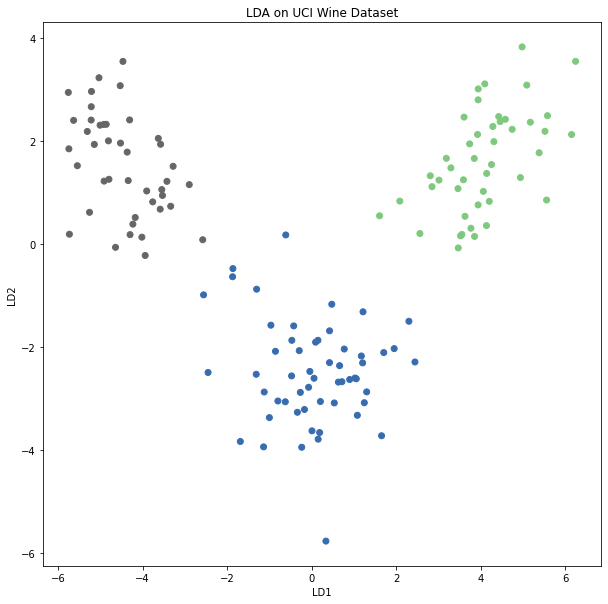

In [132]:
plt.figure(figsize=(10, 10))
scatter = plt.scatter(x['LD1'], x['LD2'], c=y_train, cmap='Accent')
plt.title('LDA on UCI Wine Dataset')
plt.xlabel('LD1')
plt.ylabel('LD2')